In [1]:
import matplotlib.pyplot as plt
import numpy as np

from fitness_observer import FitnessObserver
from labs_simulation import run_genetic_algorithm

In [2]:
iterations_axis = [i for i in range(100)]
repetitions_number = 10

In [3]:
from typing import List, Tuple

def get_fitness_mean_and_std(fitness_observers: List[FitnessObserver]) -> Tuple[List, List]:
    fitness_mean = [np.mean([fitness_observer.fitness[i] for fitness_observer in fitness_observers])
                     for i in range(100)]
    fitness_std = [np.std([fitness_observer.fitness[i] for fitness_observer in fitness_observers])
                     for i in range(100)]
    return fitness_mean, fitness_std

In [4]:
def draw_fitness_plots(fitness_observers: List[FitnessObserver], mean_fitness: List[float], algorithm_name: str):
    figure, axis = plt.subplots(1, 2, figsize=(12, 6))
    figure.tight_layout()
    axis[0].set_title(f"Fitness in {algorithm_name} algorithm")
    for fitness_observer in fitness_observers:
        axis[0].plot(iterations_axis, fitness_observer.fitness[:100])

    axis[1].set_title(f"Mean fitness in {algorithm_name} algorithm")
    axis[1].plot(iterations_axis, mean_fitness)
    plt.show()

def draw_fitness_boxplots(fitness_observers: List[FitnessObserver]):
    included_iterations = [i for i in range(0, 100, 10)]
    plt.boxplot([[fitness_observer.fitness[i] for fitness_observer in fitness_observers]
                 for i in included_iterations],
                positions=included_iterations, widths=3)
    plt.show()

## Base algorithm

In [5]:
from jmetal.algorithm.singleobjective.genetic_algorithm import GeneticAlgorithm

In [6]:
base_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in base_fitness_observers:
    run_genetic_algorithm(GeneticAlgorithm, 0.5, observers=[fitness_observer])

[2024-06-03 16:42:24,463] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:24,472] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:24,478] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:24,479] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-03 16:42:27,316] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:42:27,317] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:27,319] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:27,323] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:27,324] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 481
Computing time: 2.85440993309021


[2024-06-03 16:42:30,255] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:42:30,256] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:30,257] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:30,264] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:30,264] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 473
Computing time: 2.939032554626465


[2024-06-03 16:42:32,521] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:42:32,523] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:32,525] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:32,529] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:32,530] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 529
Computing time: 2.267021656036377


[2024-06-03 16:42:35,304] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:42:35,306] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:35,309] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:35,313] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:35,314] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 497
Computing time: 2.7829535007476807


[2024-06-03 16:42:37,559] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:42:37,560] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:37,562] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:37,568] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:37,569] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 465
Computing time: 2.252992630004883


[2024-06-03 16:42:39,750] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:42:39,751] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:39,752] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:39,758] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:39,759] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 425
Computing time: 2.190035820007324


[2024-06-03 16:42:42,185] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:42:42,186] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:42,187] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:42,191] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:42,192] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 441
Computing time: 2.433990240097046


[2024-06-03 16:42:44,734] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:42:44,735] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:44,737] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:44,740] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:44,741] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 449
Computing time: 2.54899001121521


[2024-06-03 16:42:46,980] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:42:46,981] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:46,983] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:46,987] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:46,988] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: Genetic algorithm
Fitness: 497
Computing time: 2.2460005283355713


[2024-06-03 16:42:49,194] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: Genetic algorithm
Fitness: 473
Computing time: 2.2139627933502197


In [7]:
base_fitness_mean, base_fitness_std = get_fitness_mean_and_std(base_fitness_observers)

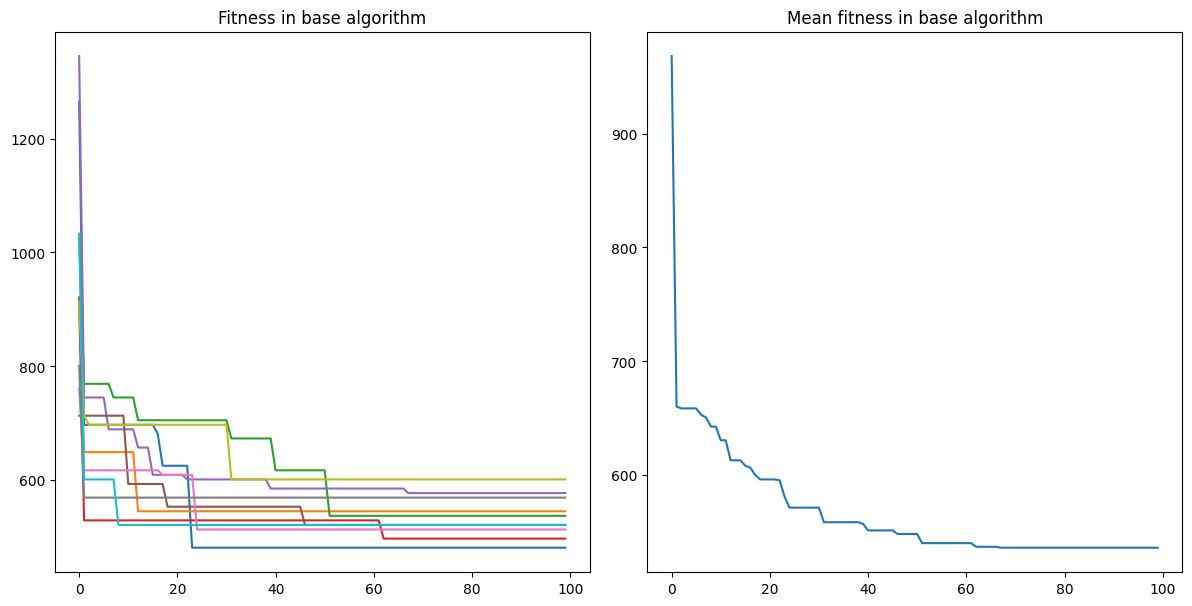

In [8]:
draw_fitness_plots(base_fitness_observers, base_fitness_mean, "base")

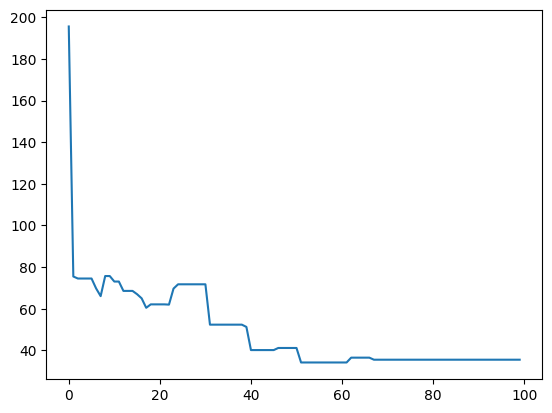

In [9]:
plt.plot(iterations_axis, base_fitness_std)
plt.show()

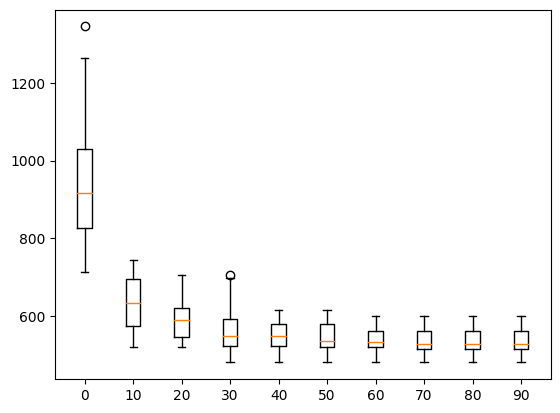

In [10]:
draw_fitness_boxplots(base_fitness_observers)

## Follow Best

In [11]:
from follow_best import FollowBestGA

In [12]:
follow_best_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in follow_best_fitness_observers:
    run_genetic_algorithm(FollowBestGA, 0.5, observers=[fitness_observer])

[2024-06-03 16:42:50,308] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:50,311] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:50,316] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:50,317] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-03 16:42:52,596] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:42:52,597] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:52,598] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:52,602] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:52,603] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 457
Computing time: 2.2890353202819824


[2024-06-03 16:42:54,825] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:42:54,827] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:54,828] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:54,833] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:54,834] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 457
Computing time: 2.229970693588257


[2024-06-03 16:42:57,456] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:42:57,458] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:57,461] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:57,467] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:57,467] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 473
Computing time: 2.6299962997436523


[2024-06-03 16:42:59,896] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:42:59,897] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:42:59,898] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:42:59,904] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:42:59,904] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 433
Computing time: 2.4389915466308594


[2024-06-03 16:43:02,019] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:43:02,020] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:43:02,022] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:43:02,025] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:43:02,026] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 433
Computing time: 2.1230409145355225


[2024-06-03 16:43:04,617] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:43:04,618] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:43:04,621] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:43:04,628] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:43:04,629] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 409
Computing time: 2.5979979038238525


[2024-06-03 16:43:07,048] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:43:07,057] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:43:07,060] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:43:07,070] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:43:07,079] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 417
Computing time: 2.437211513519287


[2024-06-03 16:43:09,500] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:43:09,502] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:43:09,506] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:43:09,511] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:43:09,512] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 465
Computing time: 2.4445674419403076


[2024-06-03 16:43:12,048] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:43:12,049] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:43:12,051] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:43:12,054] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:43:12,055] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best' mutation
Fitness: 473
Computing time: 2.547002077102661


[2024-06-03 16:43:14,974] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Follow Best' mutation
Fitness: 409
Computing time: 2.92600679397583


In [13]:
follow_best_fitness_mean, follow_best_fitness_std = get_fitness_mean_and_std(follow_best_fitness_observers)

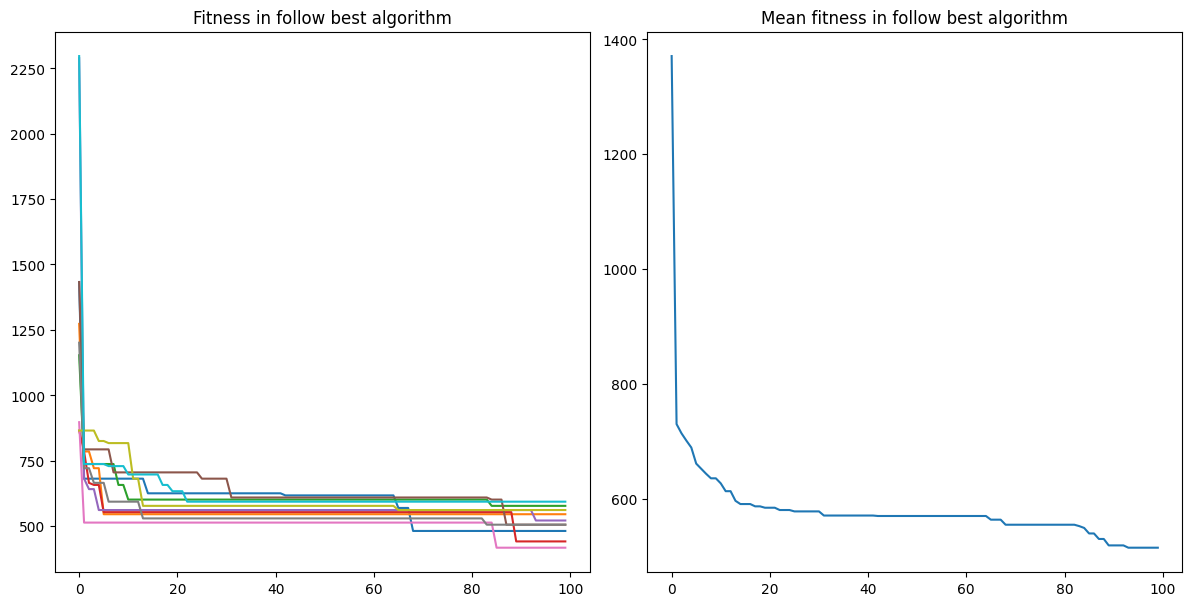

In [14]:
draw_fitness_plots(follow_best_fitness_observers, follow_best_fitness_mean, "follow best")

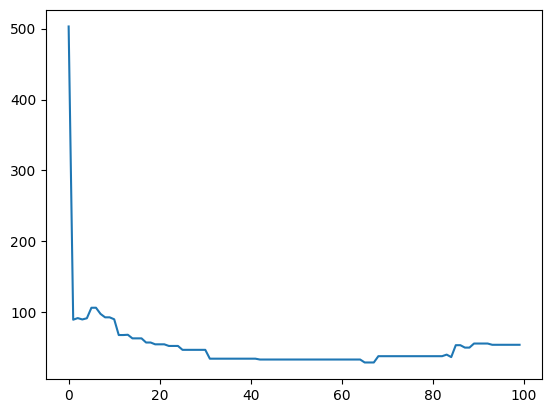

In [15]:
plt.plot(iterations_axis, follow_best_fitness_std)
plt.show()

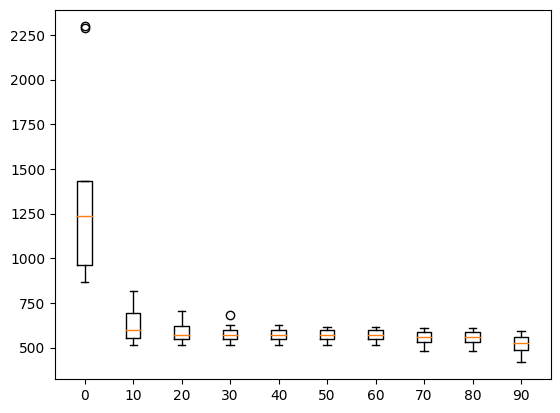

In [16]:
draw_fitness_boxplots(follow_best_fitness_observers)

## Follow Best Distinct

In [17]:
from follow_best_distinct import FollowBestDistinctGA

In [18]:
follow_best_distinct_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in follow_best_distinct_fitness_observers:
    run_genetic_algorithm(FollowBestDistinctGA, 0.5, observers=[fitness_observer])

[2024-06-03 16:43:15,775] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:43:15,779] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:43:15,786] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:43:15,787] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-03 16:43:43,158] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:43:43,160] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:43:43,162] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:43:43,169] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:43:43,171] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 441
Computing time: 27.38507652282715


[2024-06-03 16:44:13,643] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:44:13,643] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:44:13,643] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:44:13,651] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:44:13,651] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 473
Computing time: 30.482268571853638


[2024-06-03 16:44:42,344] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:44:42,346] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:44:42,346] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:44:42,346] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:44:42,346] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 473
Computing time: 28.703312158584595


[2024-06-03 16:45:10,436] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:45:10,436] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:45:10,436] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:45:10,445] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:45:10,445] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 465
Computing time: 28.090507984161377


[2024-06-03 16:45:35,417] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:45:35,418] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:45:35,420] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:45:35,425] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:45:35,426] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 457
Computing time: 24.981147527694702


[2024-06-03 16:46:05,344] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:46:05,344] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:46:05,352] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:46:05,352] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:46:05,352] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 489
Computing time: 29.926040172576904


[2024-06-03 16:46:31,904] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:46:31,908] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:46:31,908] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:46:31,912] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:46:31,912] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 489
Computing time: 26.560511112213135


[2024-06-03 16:47:00,249] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:47:00,251] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:47:00,252] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:47:00,256] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:47:00,257] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 513
Computing time: 28.34256076812744


[2024-06-03 16:47:29,723] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:47:29,724] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:47:29,726] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:47:29,733] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:47:29,734] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 481
Computing time: 29.47378396987915


[2024-06-03 16:48:01,189] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Follow Best Distinct' mutation
Fitness: 473
Computing time: 31.46598482131958


In [19]:
follow_best_distinct_fitness_mean, follow_best_distinct_fitness_std = get_fitness_mean_and_std(follow_best_distinct_fitness_observers)

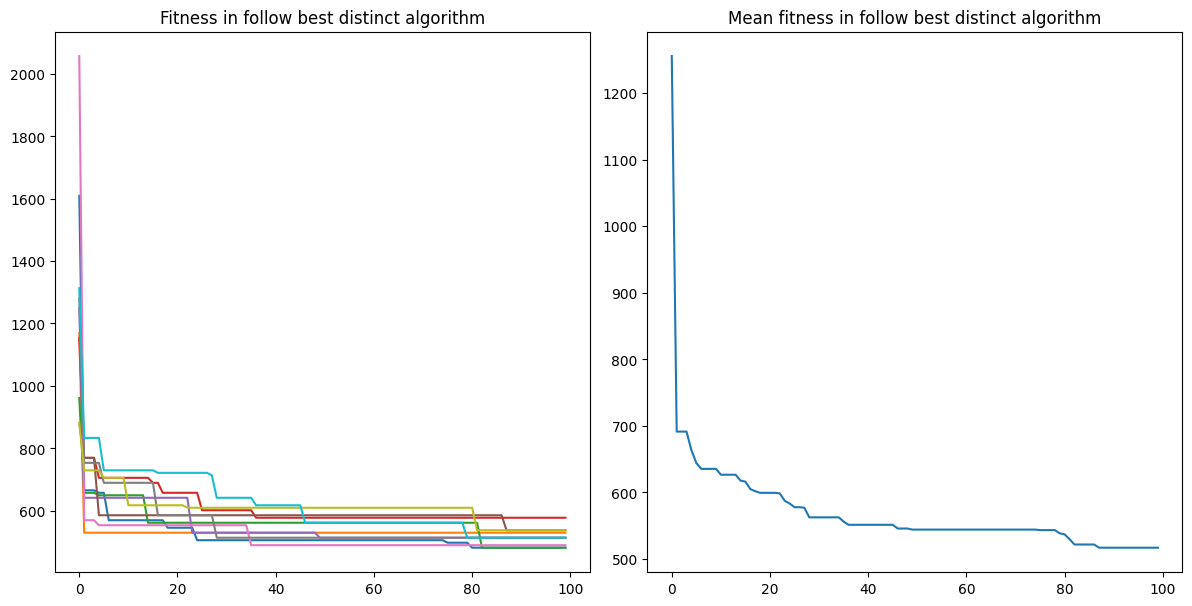

In [20]:
draw_fitness_plots(follow_best_distinct_fitness_observers, follow_best_distinct_fitness_mean, "follow best distinct")

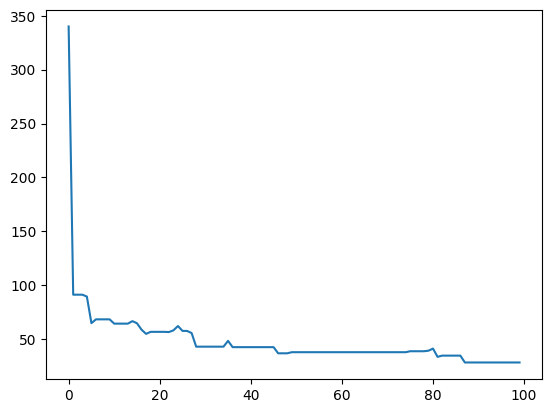

In [21]:
plt.plot(iterations_axis, follow_best_distinct_fitness_std)
plt.show()

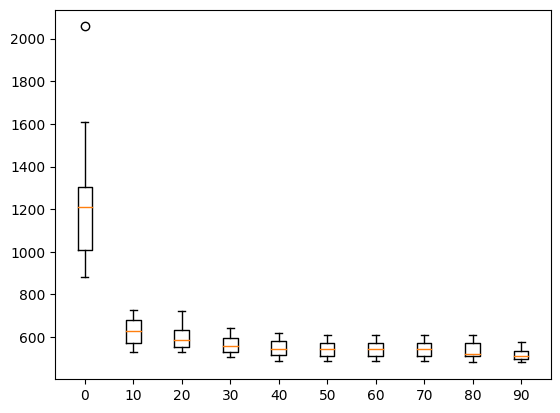

In [22]:
draw_fitness_boxplots(follow_best_distinct_fitness_observers)

## Repel Worst Gravity

In [23]:
from repel_worst_gravity import RepelWorstGravity

In [24]:
repel_worst_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in repel_worst_fitness_observers:
    run_genetic_algorithm(RepelWorstGravity, 0.5, observers=[fitness_observer])

[2024-06-03 16:48:01,873] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:01,875] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:01,881] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:01,882] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-03 16:48:04,158] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:04,159] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:04,161] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:04,165] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:04,165] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 401
Computing time: 2.286262273788452


[2024-06-03 16:48:06,441] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:06,442] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:06,444] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:06,448] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:06,448] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 401
Computing time: 2.282998561859131


[2024-06-03 16:48:08,750] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:08,751] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:08,752] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:08,756] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:08,757] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 417
Computing time: 2.3090410232543945


[2024-06-03 16:48:10,980] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:10,981] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:10,984] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:10,992] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:10,993] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 449
Computing time: 2.2304482460021973


[2024-06-03 16:48:13,394] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:13,395] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:13,397] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:13,402] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:13,403] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 409
Computing time: 2.4135525226593018


[2024-06-03 16:48:15,564] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:15,565] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:15,567] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:15,571] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:15,572] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 505
Computing time: 2.1699981689453125


[2024-06-03 16:48:17,665] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:17,666] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:17,669] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:17,672] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:17,673] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 401
Computing time: 2.100998640060425


[2024-06-03 16:48:20,046] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:20,047] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:20,049] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:20,052] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:20,053] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 465
Computing time: 2.3810017108917236


[2024-06-03 16:48:22,335] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:22,336] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:22,338] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:22,342] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:22,342] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 449
Computing time: 2.2888176441192627


[2024-06-03 16:48:24,699] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Repel Worst Gravity' mutation
Fitness: 473
Computing time: 2.3639700412750244


In [25]:
repel_worst_fitness_mean, repel_worst_fitness_std = get_fitness_mean_and_std(repel_worst_fitness_observers)

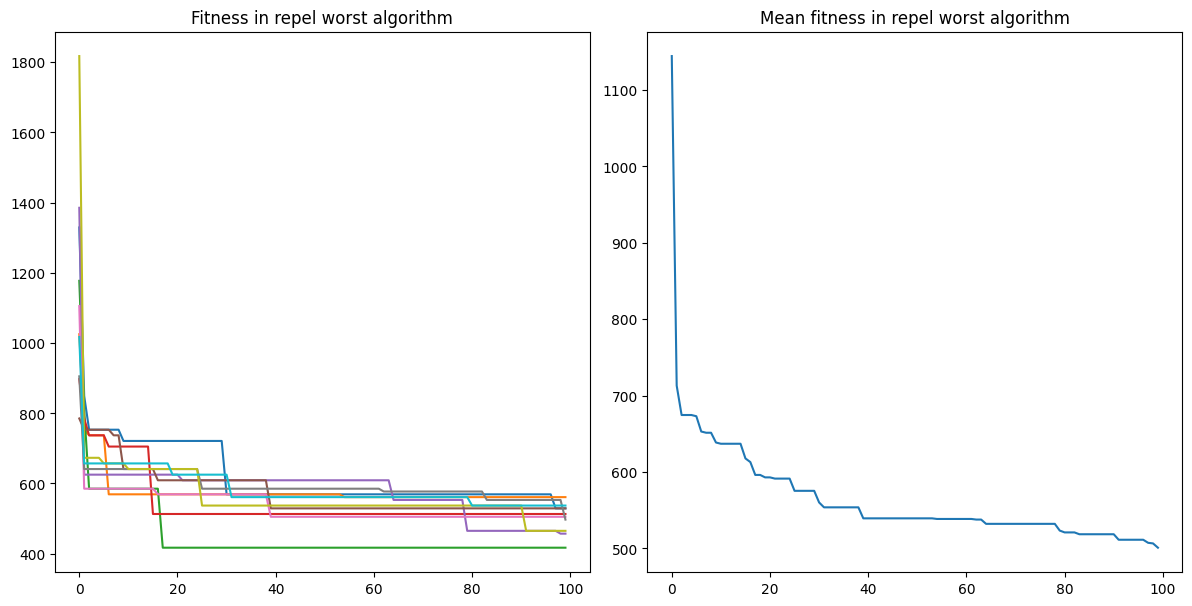

In [26]:
draw_fitness_plots(repel_worst_fitness_observers, repel_worst_fitness_mean, "repel worst")

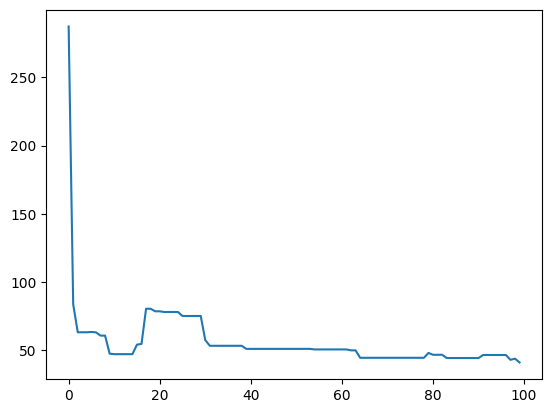

In [27]:
plt.plot(iterations_axis, repel_worst_fitness_std)
plt.show()

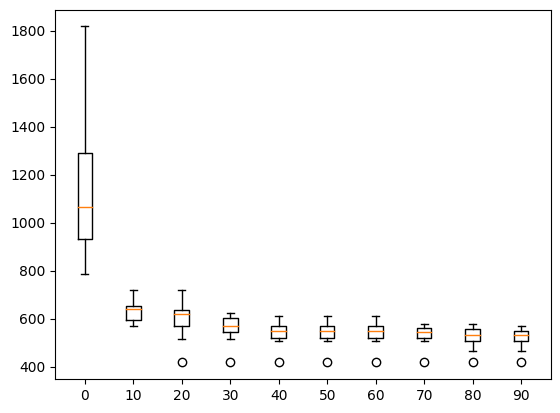

In [28]:
draw_fitness_boxplots(repel_worst_fitness_observers)

## Repel Worst Gravity Multistep

In [29]:
from repel_worst_gravity_multistep import RepelWorstGravityMultistep

In [30]:
repel_worst_multistep_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in repel_worst_multistep_fitness_observers:
    run_genetic_algorithm(RepelWorstGravityMultistep, 0.5, observers=[fitness_observer])

[2024-06-03 16:48:25,512] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:25,514] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:25,518] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:25,520] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-03 16:48:28,545] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:28,546] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:28,549] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:28,557] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:28,558] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 345
Computing time: 3.0347330570220947


[2024-06-03 16:48:31,440] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:31,441] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:31,443] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:31,446] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:31,448] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 441
Computing time: 2.894196033477783


[2024-06-03 16:48:34,208] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:34,209] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:34,211] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:34,217] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:34,218] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 425
Computing time: 2.7680130004882812


[2024-06-03 16:48:36,826] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:36,827] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:36,830] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:36,833] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:36,834] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 425
Computing time: 2.6180362701416016


[2024-06-03 16:48:39,546] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:39,547] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:39,548] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:39,553] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:39,553] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 401
Computing time: 2.719949960708618


[2024-06-03 16:48:42,432] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:42,433] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:42,436] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:42,441] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:42,442] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 329
Computing time: 2.8860018253326416


[2024-06-03 16:48:45,535] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:45,536] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:45,538] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:45,543] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:45,544] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 441
Computing time: 3.1030023097991943


[2024-06-03 16:48:48,371] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:48,371] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:48,373] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:48,377] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:48,378] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 425
Computing time: 2.834994077682495


[2024-06-03 16:48:51,113] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:51,114] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:51,116] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:51,121] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:51,122] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 369
Computing time: 2.743004322052002


[2024-06-03 16:48:53,847] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Fitness: 441
Computing time: 2.7350058555603027


In [31]:
repel_worst_multistep_fitness_mean, repel_worst_multistep_fitness_std = get_fitness_mean_and_std(repel_worst_multistep_fitness_observers)

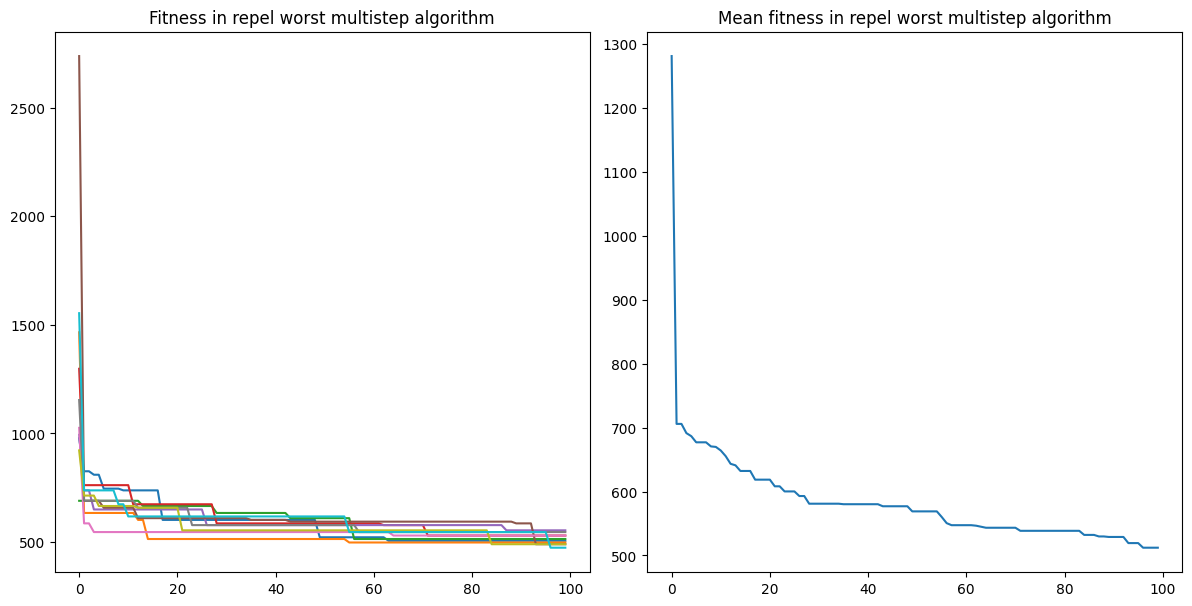

In [32]:
draw_fitness_plots(repel_worst_multistep_fitness_observers, repel_worst_multistep_fitness_mean, "repel worst multistep")

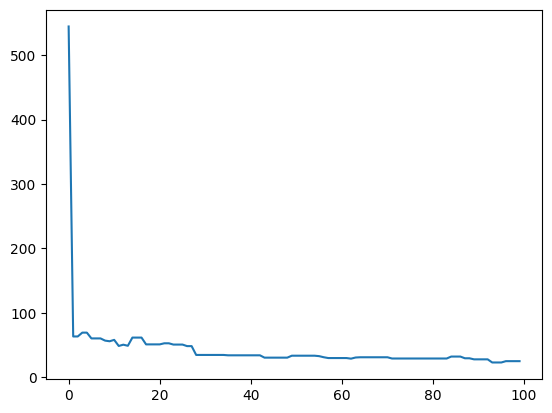

In [33]:
plt.plot(iterations_axis, repel_worst_multistep_fitness_std)
plt.show()

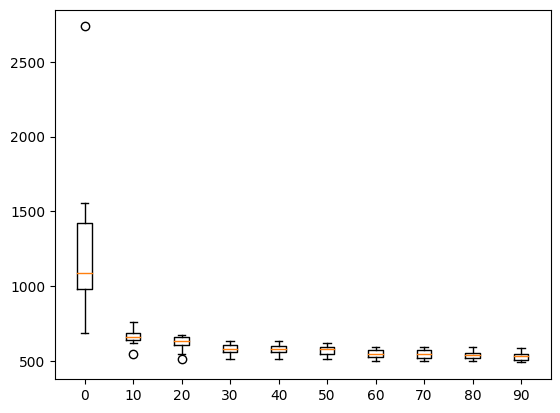

In [34]:
draw_fitness_boxplots(repel_worst_multistep_fitness_observers)

## Follow Best + Repel Worst Gravity

In [35]:
from combo_best_gravity import ComboBestGravity

In [36]:
combo_best_gravity_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in combo_best_gravity_fitness_observers:
    run_genetic_algorithm(ComboBestGravity, 0.5, observers=[fitness_observer])

[2024-06-03 16:48:55,104] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:55,107] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:55,113] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:55,114] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-03 16:48:58,355] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:48:58,356] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:48:58,358] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:48:58,362] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:48:58,362] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity' mutation
Fitness: 441
Computing time: 3.2516210079193115


[2024-06-03 16:49:00,687] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:00,688] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:00,690] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:00,693] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:00,694] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity' mutation
Fitness: 449
Computing time: 2.3320014476776123


[2024-06-03 16:49:03,005] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:03,006] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:03,009] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:03,013] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:03,013] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity' mutation
Fitness: 441
Computing time: 2.3179993629455566


[2024-06-03 16:49:05,410] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:05,411] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:05,413] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:05,416] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:05,417] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity' mutation
Fitness: 393
Computing time: 2.405001163482666


[2024-06-03 16:49:07,822] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:07,823] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:07,825] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:07,829] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:07,830] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity' mutation
Fitness: 401
Computing time: 2.4120430946350098


[2024-06-03 16:49:10,369] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:10,370] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:10,373] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:10,383] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:10,384] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity' mutation
Fitness: 465
Computing time: 2.5469908714294434


[2024-06-03 16:49:13,174] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:13,176] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:13,177] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:13,182] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:13,183] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity' mutation
Fitness: 417
Computing time: 2.804996967315674


[2024-06-03 16:49:15,790] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:15,791] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:15,793] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:15,800] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:15,801] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity' mutation
Fitness: 417
Computing time: 2.6168081760406494


[2024-06-03 16:49:18,230] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:18,231] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:18,233] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:18,237] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:18,238] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity' mutation
Fitness: 425
Computing time: 2.4391112327575684


[2024-06-03 16:49:21,221] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Combo Best Gravity' mutation
Fitness: 425
Computing time: 2.9909634590148926


In [37]:
combo_best_gravity_fitness_mean, combo_best_gravity_fitness_std = get_fitness_mean_and_std(combo_best_gravity_fitness_observers)

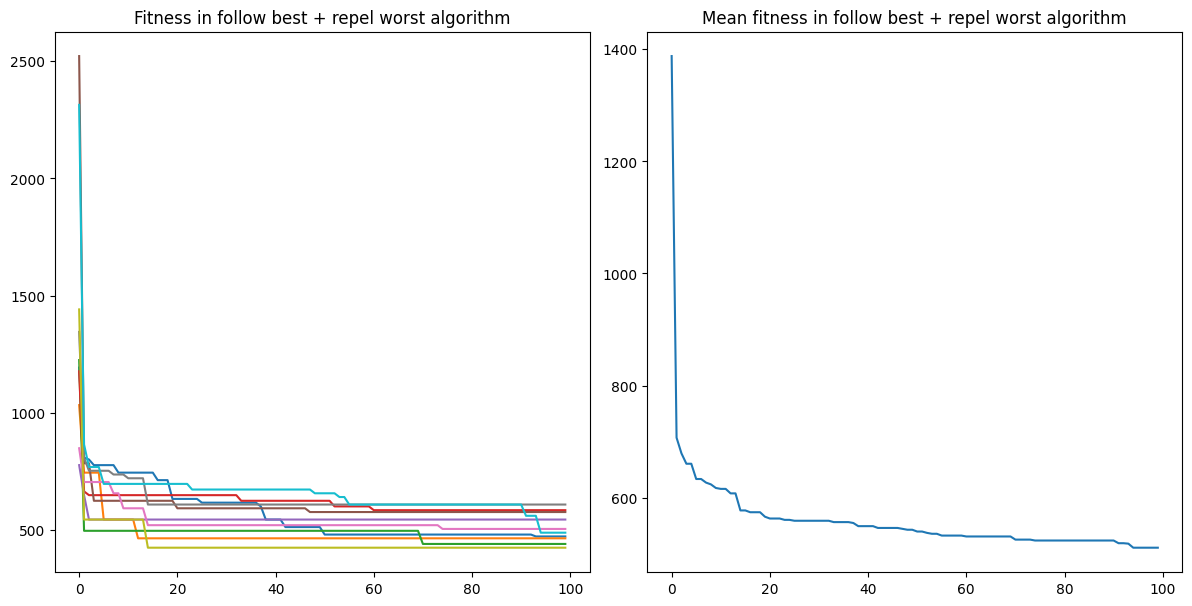

In [38]:
draw_fitness_plots(combo_best_gravity_fitness_observers, combo_best_gravity_fitness_mean, "follow best + repel worst")

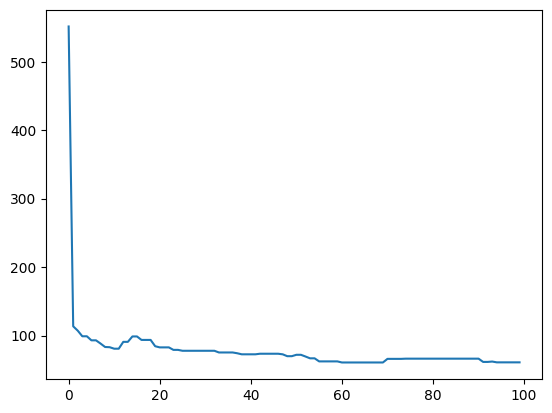

In [39]:
plt.plot(iterations_axis, combo_best_gravity_fitness_std)
plt.show()

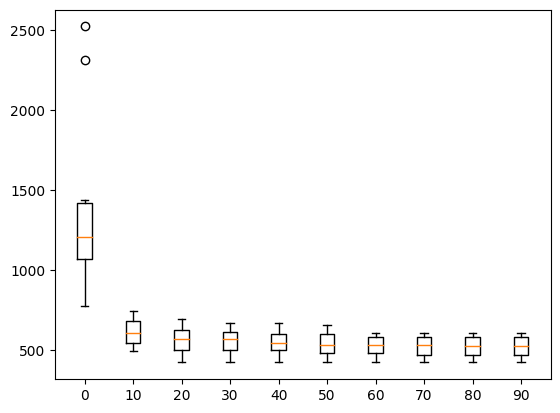

In [40]:
draw_fitness_boxplots(combo_best_gravity_fitness_observers)

## Follow Best + Repel Worst Gravity Multistep

In [41]:
from combo_best_gravity_multistep import ComboBestGravityMultistep

In [42]:
combo_best_gravity_multistep_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in combo_best_gravity_multistep_fitness_observers:
    run_genetic_algorithm(ComboBestGravityMultistep, 0.5, observers=[fitness_observer])

[2024-06-03 16:49:22,084] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:22,090] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:22,098] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:22,099] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-03 16:49:25,134] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:25,135] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:25,138] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:25,143] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:25,144] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity Multistep' mutation
Fitness: 457
Computing time: 3.050041913986206


[2024-06-03 16:49:28,018] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:28,019] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:28,020] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:28,024] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:28,025] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity Multistep' mutation
Fitness: 385
Computing time: 2.884037494659424


[2024-06-03 16:49:30,803] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:30,804] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:30,806] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:30,812] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:30,812] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity Multistep' mutation
Fitness: 409
Computing time: 2.7850089073181152


[2024-06-03 16:49:33,816] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:33,818] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:33,819] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:33,824] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:33,825] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity Multistep' mutation
Fitness: 401
Computing time: 3.0129969120025635


[2024-06-03 16:49:36,931] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:36,931] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:36,933] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:36,937] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:36,938] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity Multistep' mutation
Fitness: 377
Computing time: 3.1147429943084717


[2024-06-03 16:49:40,489] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:40,491] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:40,494] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:40,499] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:40,500] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity Multistep' mutation
Fitness: 457
Computing time: 3.5590147972106934


[2024-06-03 16:49:43,382] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:43,383] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:43,385] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:43,390] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:43,391] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity Multistep' mutation
Fitness: 385
Computing time: 2.891169309616089


[2024-06-03 16:49:46,201] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:46,202] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:46,204] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:46,209] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:46,211] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity Multistep' mutation
Fitness: 457
Computing time: 2.8190414905548096


[2024-06-03 16:49:48,872] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:49:48,873] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:48,874] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:48,879] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:48,879] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Best Gravity Multistep' mutation
Fitness: 401
Computing time: 2.671294927597046


[2024-06-03 16:49:51,506] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Combo Best Gravity Multistep' mutation
Fitness: 449
Computing time: 2.6339597702026367


In [43]:
combo_best_gravity_multistep_fitness_mean, combo_best_gravity_multistep_fitness_std = get_fitness_mean_and_std(combo_best_gravity_multistep_fitness_observers)

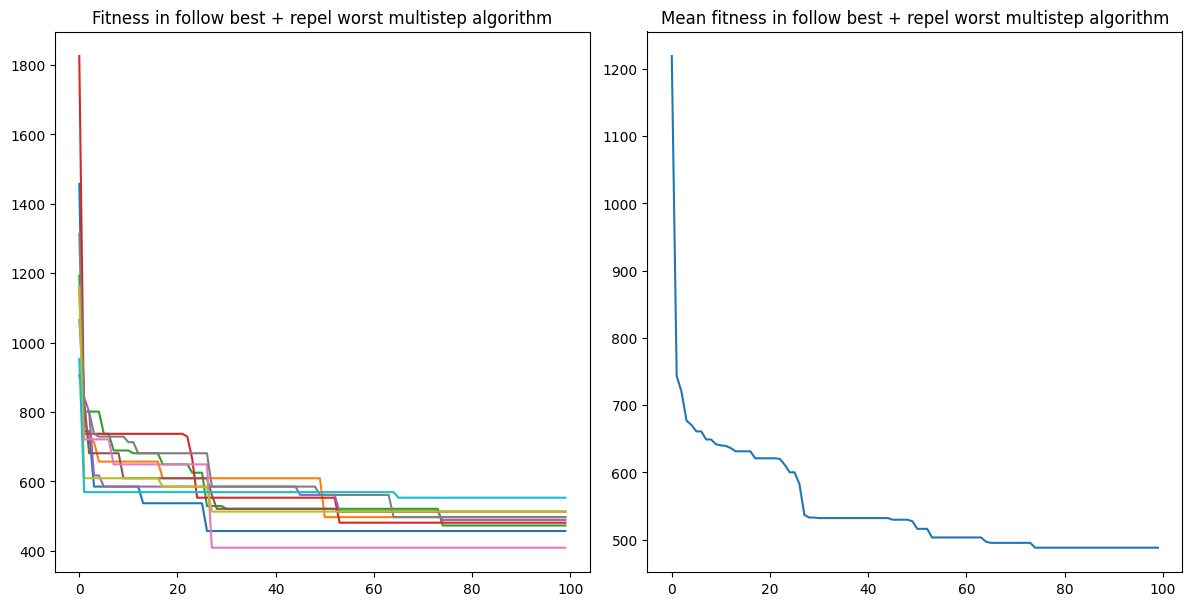

In [44]:
draw_fitness_plots(combo_best_gravity_multistep_fitness_observers, combo_best_gravity_multistep_fitness_mean, "follow best + repel worst multistep")

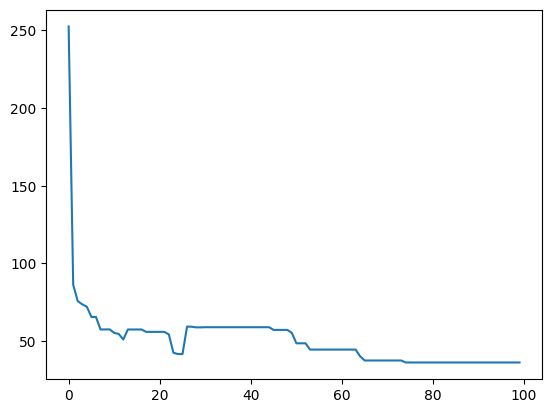

In [45]:
plt.plot(iterations_axis, combo_best_gravity_multistep_fitness_std)
plt.show()

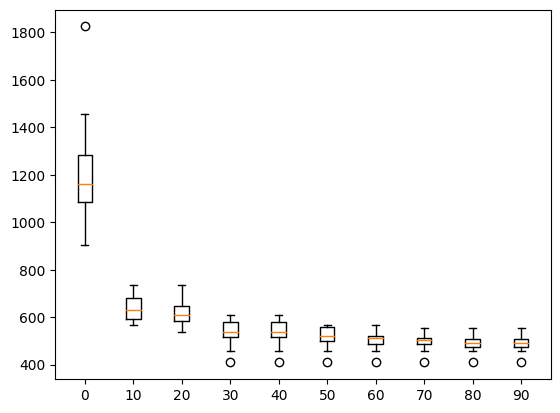

In [46]:
draw_fitness_boxplots(combo_best_gravity_multistep_fitness_observers)

## Follow Best Distinct + Repel Worst Gravity

In [47]:
from combo_distinct_gravity import ComboDistinctGravity

In [48]:
combo_distinct_gravity_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in combo_distinct_gravity_fitness_observers:
    run_genetic_algorithm(ComboDistinctGravity, 0.5, observers=[fitness_observer])

[2024-06-03 16:49:52,232] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:49:52,235] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:49:52,240] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:49:52,241] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-03 16:50:20,708] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:50:20,709] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:50:20,711] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:50:20,714] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:50:20,715] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity' mutation
Fitness: 465
Computing time: 28.476563215255737


[2024-06-03 16:50:48,978] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:50:48,979] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:50:48,981] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:50:48,986] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:50:48,986] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity' mutation
Fitness: 449
Computing time: 28.270760536193848


[2024-06-03 16:51:24,518] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:51:24,519] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:51:24,521] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:51:24,525] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:51:24,526] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity' mutation
Fitness: 465
Computing time: 35.539249897003174


[2024-06-03 16:51:55,750] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:51:55,750] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:51:55,752] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:51:55,756] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:51:55,757] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity' mutation
Fitness: 441
Computing time: 31.23104190826416


[2024-06-03 16:52:25,542] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:52:25,543] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:52:25,545] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:52:25,551] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:52:25,552] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity' mutation
Fitness: 465
Computing time: 29.79300045967102


[2024-06-03 16:52:55,461] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:52:55,462] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:52:55,465] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:52:55,471] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:52:55,472] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity' mutation
Fitness: 465
Computing time: 29.919034957885742


[2024-06-03 16:53:28,078] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:53:28,080] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:53:28,082] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:53:28,088] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:53:28,089] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity' mutation
Fitness: 489
Computing time: 32.61769104003906


[2024-06-03 16:53:59,299] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:53:59,300] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:53:59,301] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:53:59,304] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:53:59,306] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity' mutation
Fitness: 489
Computing time: 31.219125032424927


[2024-06-03 16:54:30,925] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:54:30,926] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:54:30,929] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:54:30,934] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:54:30,934] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity' mutation
Fitness: 505
Computing time: 31.62672448158264


[2024-06-03 16:55:16,159] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Combo Distinct Gravity' mutation
Fitness: 489
Computing time: 45.2335569858551


In [49]:
combo_distinct_gravity_fitness_mean, combo_distinct_gravity_fitness_std = get_fitness_mean_and_std(combo_distinct_gravity_fitness_observers)

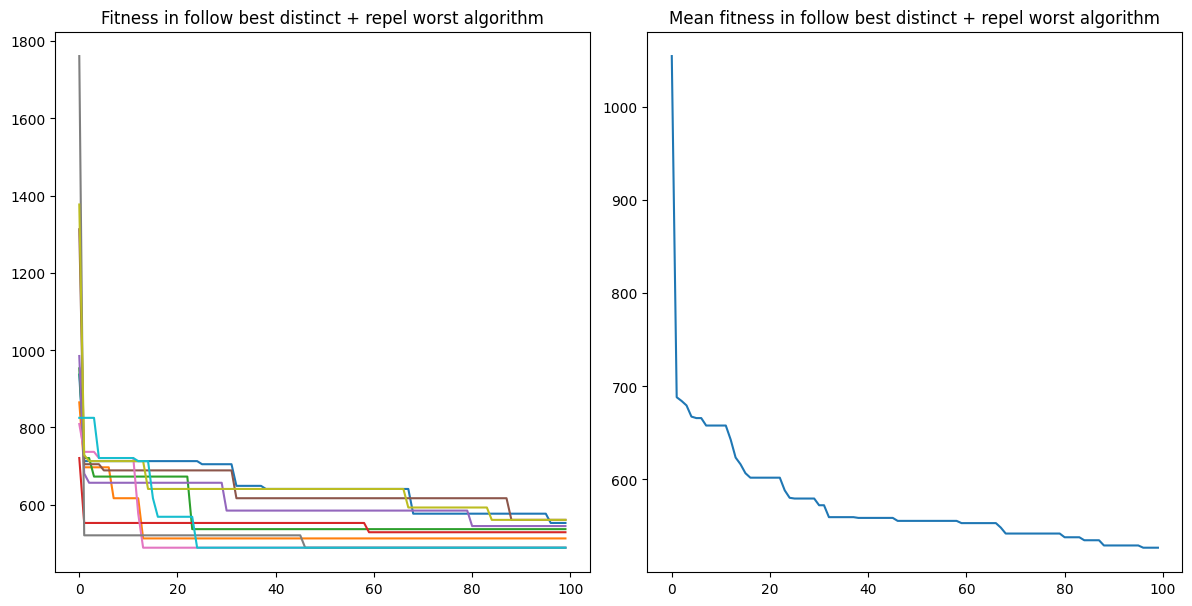

In [50]:
draw_fitness_plots(combo_distinct_gravity_fitness_observers, combo_distinct_gravity_fitness_mean, "follow best distinct + repel worst")

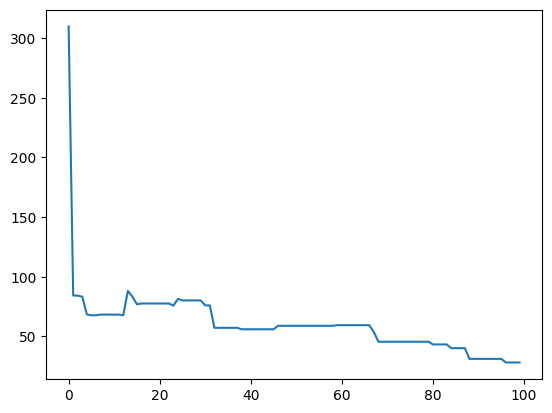

In [51]:
plt.plot(iterations_axis, combo_distinct_gravity_fitness_std)
plt.show()

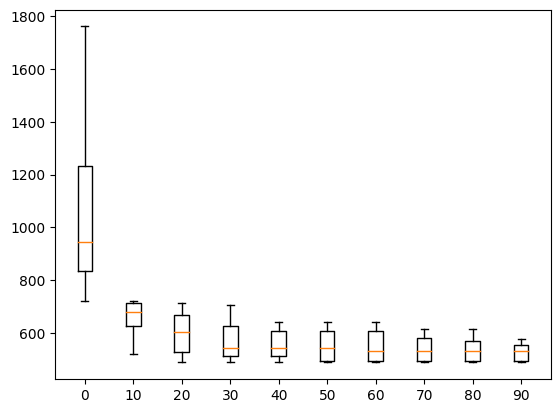

In [52]:
draw_fitness_boxplots(combo_distinct_gravity_fitness_observers)

## Follow Best Distinct + Repel Worst Gravity Multistep

In [53]:
from combo_distinct_gravity_multistep import ComboDistinctGravityMultistep

In [54]:
combo_distinct_gravity_multistep_fitness_observers = [FitnessObserver() for _ in range(repetitions_number)]
for fitness_observer in combo_distinct_gravity_multistep_fitness_observers:
    run_genetic_algorithm(ComboDistinctGravityMultistep, 0.5, observers=[fitness_observer])

[2024-06-03 16:55:17,866] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:55:17,870] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:55:17,881] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:55:17,883] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-06-03 16:56:15,900] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:56:15,906] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:56:15,910] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:56:15,915] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:56:15,916] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity Multistep' mutation
Fitness: 385
Computing time: 58.04019618034363


[2024-06-03 16:56:57,272] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:56:57,276] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:56:57,285] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:56:57,297] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:56:57,300] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity Multistep' mutation
Fitness: 433
Computing time: 41.369054079055786


[2024-06-03 16:57:41,198] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:57:41,201] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:57:41,203] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:57:41,207] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:57:41,208] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity Multistep' mutation
Fitness: 489
Computing time: 43.92499661445618


[2024-06-03 16:58:22,395] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:58:22,400] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:58:22,408] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:58:22,422] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:58:22,426] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity Multistep' mutation
Fitness: 449
Computing time: 41.19799065589905


[2024-06-03 16:58:57,864] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:58:57,868] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:58:57,872] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:58:57,878] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:58:57,880] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity Multistep' mutation
Fitness: 425
Computing time: 35.46750235557556


[2024-06-03 16:59:38,195] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 16:59:38,197] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 16:59:38,200] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 16:59:38,206] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 16:59:38,207] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity Multistep' mutation
Fitness: 377
Computing time: 40.32884359359741


[2024-06-03 17:00:17,291] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 17:00:17,292] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 17:00:17,295] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 17:00:17,302] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 17:00:17,304] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity Multistep' mutation
Fitness: 393
Computing time: 39.095712184906006


[2024-06-03 17:00:50,636] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 17:00:50,638] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 17:00:50,640] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 17:00:50,647] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 17:00:50,648] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity Multistep' mutation
Fitness: 417
Computing time: 33.34491729736328


[2024-06-03 17:01:26,647] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-06-03 17:01:26,649] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-06-03 17:01:26,650] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-06-03 17:01:26,658] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-06-03 17:01:26,660] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met


Algorithm: GA with 'Combo Distinct Gravity Multistep' mutation
Fitness: 393
Computing time: 36.00982856750488


[2024-06-03 17:02:02,514] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: GA with 'Combo Distinct Gravity Multistep' mutation
Fitness: 385
Computing time: 35.86613631248474


In [55]:
combo_distinct_gravity_multistep_fitness_mean, combo_distinct_gravity_multistep_fitness_std = get_fitness_mean_and_std(combo_distinct_gravity_multistep_fitness_observers)

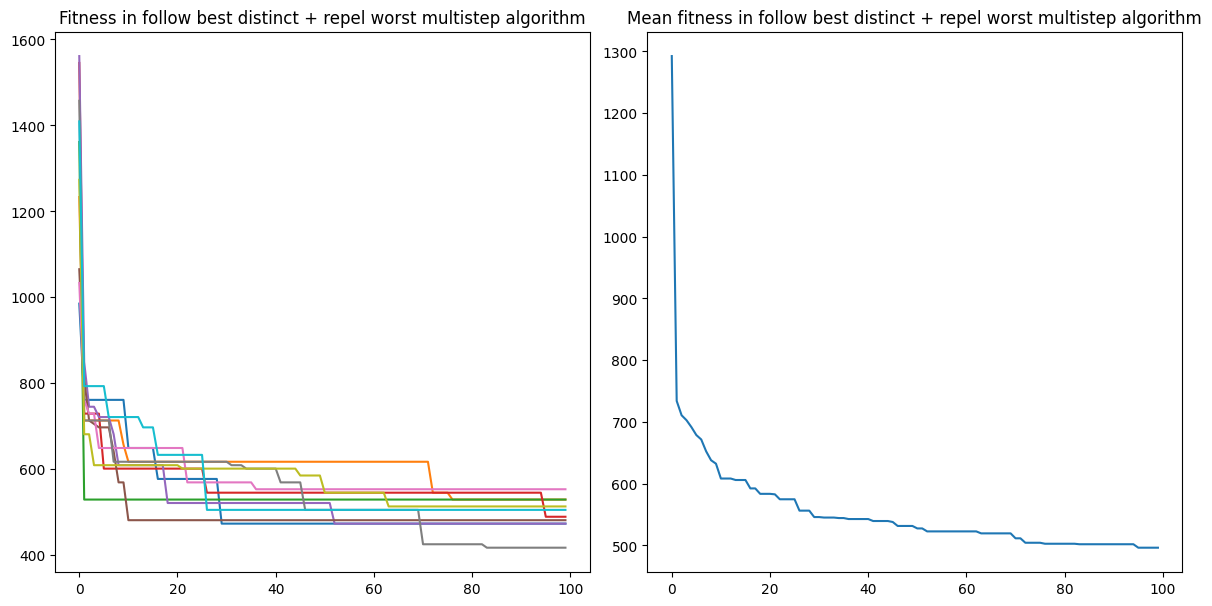

In [56]:
draw_fitness_plots(combo_distinct_gravity_multistep_fitness_observers, combo_distinct_gravity_multistep_fitness_mean, "follow best distinct + repel worst multistep")

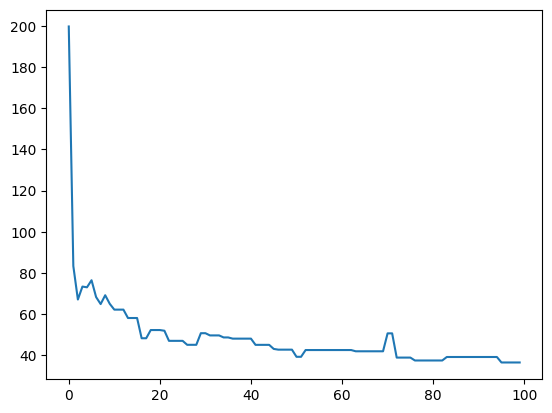

In [57]:
plt.plot(iterations_axis, combo_distinct_gravity_multistep_fitness_std)
plt.show()

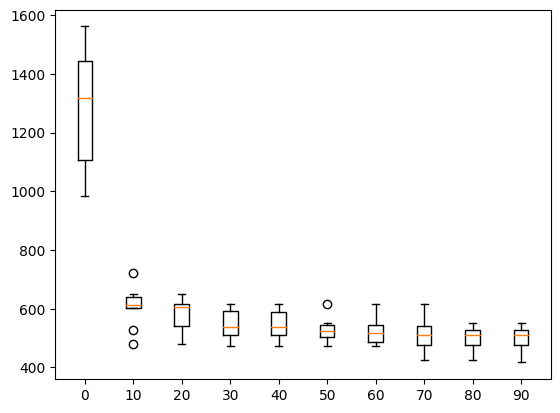

In [60]:
draw_fitness_boxplots(combo_distinct_gravity_multistep_fitness_observers)

## Comparison

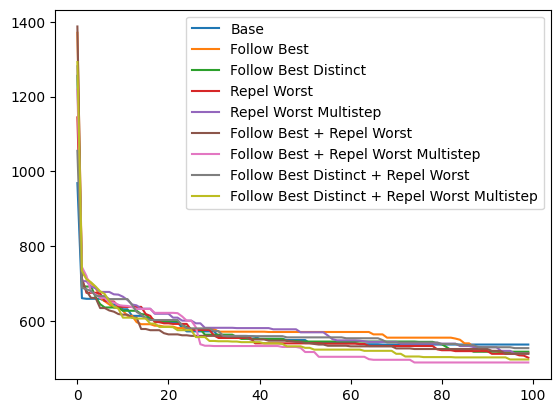

In [61]:
plt.plot(iterations_axis, base_fitness_mean, label="Base")
plt.plot(iterations_axis, follow_best_fitness_mean, label="Follow Best")
plt.plot(iterations_axis, follow_best_distinct_fitness_mean, label="Follow Best Distinct")
plt.plot(iterations_axis, repel_worst_fitness_mean, label="Repel Worst")
plt.plot(iterations_axis, repel_worst_multistep_fitness_mean, label="Repel Worst Multistep")
plt.plot(iterations_axis, combo_best_gravity_fitness_mean, label="Follow Best + Repel Worst")
plt.plot(iterations_axis, combo_best_gravity_multistep_fitness_mean, label="Follow Best + Repel Worst Multistep")
plt.plot(iterations_axis, combo_distinct_gravity_fitness_mean, label="Follow Best Distinct + Repel Worst")
plt.plot(iterations_axis, combo_distinct_gravity_multistep_fitness_mean, label="Follow Best Distinct + Repel Worst Multistep")
plt.legend()
plt.show()